# **Project Overview**
The Iris Classification project involves creating a machine learning model to classify iris flowers into three
species (Setosa, Versicolour, and Virginica) based on the length and width of their petals and sepals. This is a
classic problem in machine learning and is often used as an introductory example for classification algorithms.

## Importing the Necessary Libraries

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

### Load the Data



In [43]:
df = pd.read_csv("/content/drive/MyDrive/Unified Mentor/Iris.csv")

In [44]:
df.shape

(150, 5)

### So our dataset contains 150 rows and five columns.

### Let us now find out the column names.

In [45]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

### Let us now find out the number of datapoints in each class.

In [46]:
df["Species"].value_counts()

,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


### So we can see that this is a balanced dataset because we have 50 datapoints for each class.

In [47]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# **Data Preprocessing**

### Let us see some high level statistics about the data.

In [48]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Let us check the datatypes in the given dataset.

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### Let us check if the given dataset contains null values. If more than 15% of the enteries in any column are null, we will drop that column. But if the percentage of null values in my column is less than 15%, we will handle the missing values by using the imputation techniques like mean, median and mode.

In [50]:
df.isna().sum()

,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


### Let us now check if any duplicate enteries exist in the dataset.

In [51]:
df.duplicated().sum()

3

# **Exploratory Data Analysis**

### 2D Scatter Plot

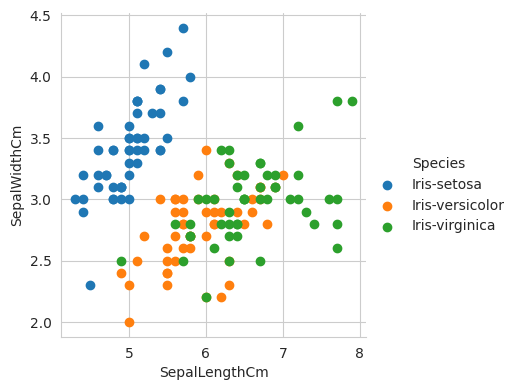

In [52]:
sns.set_style("whitegrid");
sns.FacetGrid(df, hue="Species", height=4) \
   .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
   .add_legend();
plt.show();

### In order to make more sense out of the 2 D scatter plot, we have color coded each class. Note that the setosa datapoints are linearly separable from the versicolor and virginica datapoints. In a similar fashion, we can draw multiple scatter plots for each combination of features. In total, for 4 features we can draw 6 2D scatter plots.

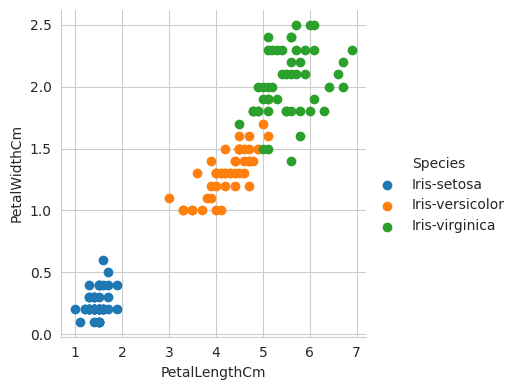

In [53]:
sns.set_style("whitegrid");
sns.FacetGrid(df, hue="Species", height=4) \
   .map(plt.scatter, "PetalLengthCm", "PetalWidthCm") \
   .add_legend();
plt.show();

### **Observations**
By using sepal length and sepal width as features, we can easily separate setosa flowers from the other species of iris flowers. It is difficult to separate versicolor flowers from virginica flowers because they overlap considerably.

### Pair Plot

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


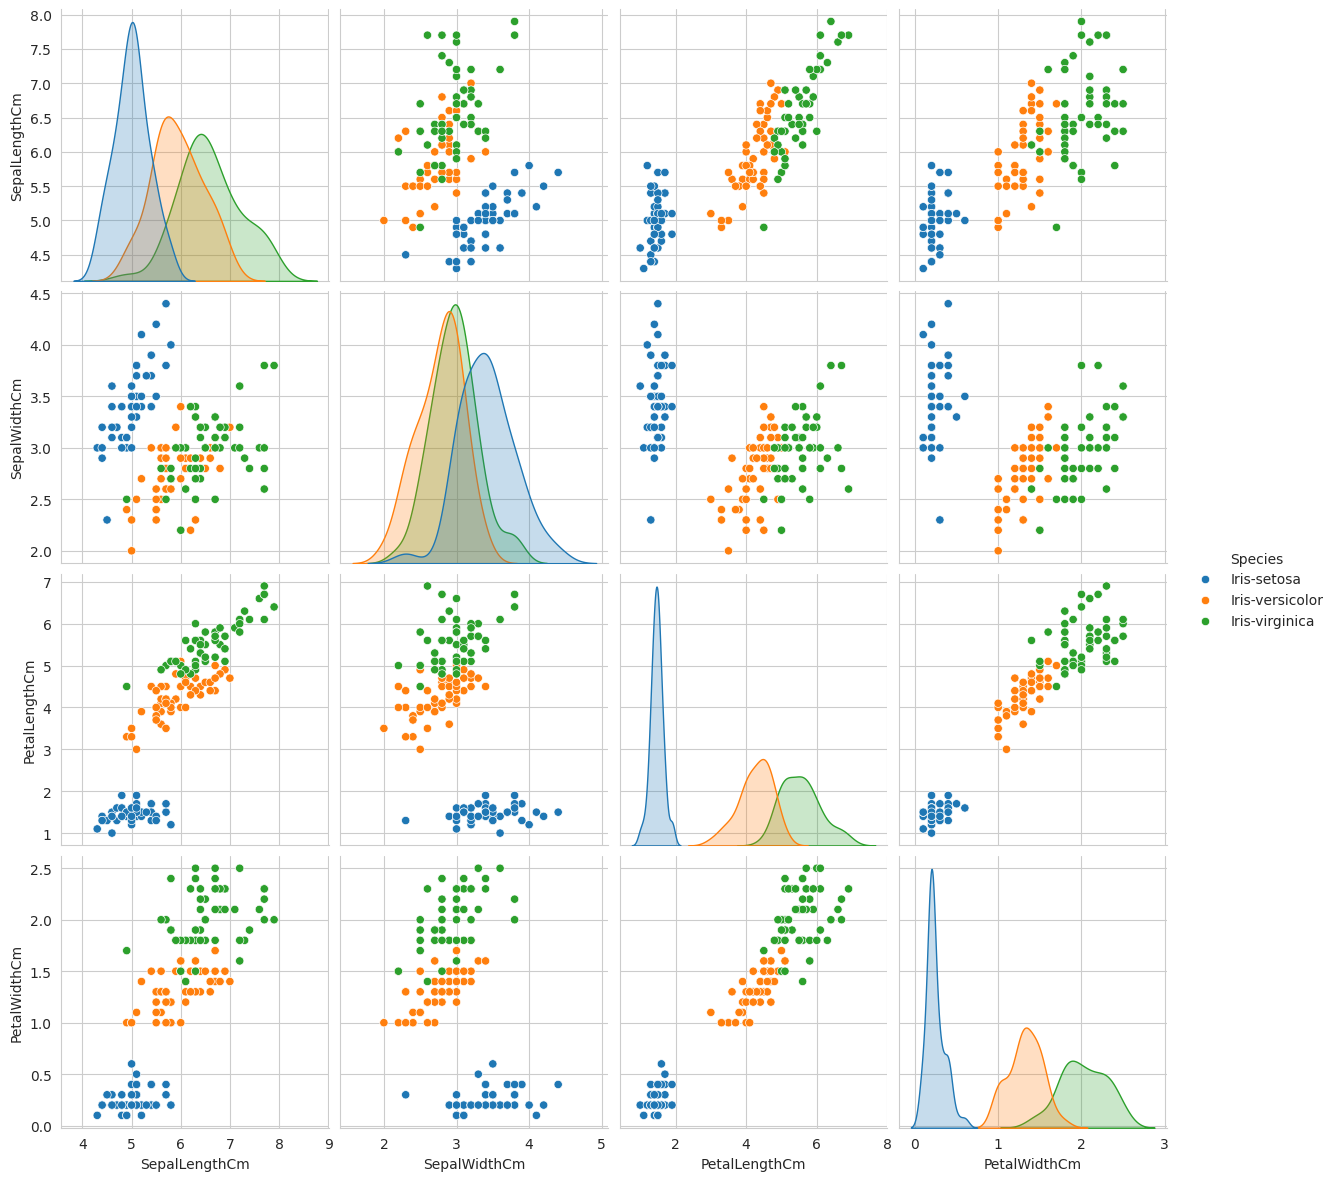

In [54]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(df, hue="Species", size=3);
plt.show()

### **Observations**
The diagonal enteries of the pair plot are the probability distribution functions of the individual features. We can see that petal length and petal width are the most useful features for distinguishing the different flower types.

In [55]:
X = df.drop('Species', axis=1)
y = df['Species']

print(X.shape)
print(y.shape)

(150, 4)
(150,)


### We will now split the given data into training and testing sets

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Standardize the features using standard scaler. This method calculates the mean and the standard deviation to use later for scaling the data. This method fits the parameters of the data and then transforms it.

In [57]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### **Model Training**
We will be using K-Nearest Neighbors for classification. K-Nearest Neighbors (KNN) is a machine learning algorithm used for classification and regression tasks. It's a supervised learning method that uses proximity to make predictions or classifications.


In [58]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [59]:
# Make predictions
y_pred = knn.predict(X_test)

### **Model Evaluation**

In [60]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



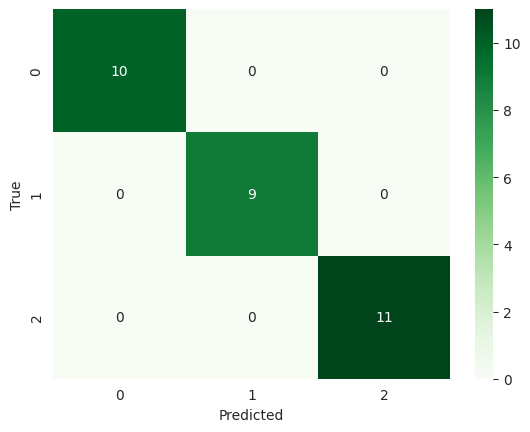

In [61]:
# Plot confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### **Observations**

1) The confusion matrix is a 3x3 matrix because the Iris dataset has three classes (species of Iris flowers): Setosa, Versicolor, and Virginica.

2) The rows of the confusion matrix represent the actual classes (true labels). The columns of the confusion matrix represent the predicted classes (predictions made by the KNN model).

3) The model performed perfectly for Setosa as all the 10 instances were correctly classified.

4) The model performed perfectly for Setosa as all the 9 instances were correctly classified.

5) The model performed perfectly for Setosa as all the 11 instances were correctly classified.

6) The confusion matrix shows that the KNN model performs very well on the iris dataset.